In [116]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [117]:
df30 = pd.read_csv('C:/Users/Gustavo Chinchayan/Documents/Python/DLD/DS_Files/ChatLogs/chatriotgames/chatriotgames101821Average30Second.csv', index_col='Date', parse_dates=True)

In [118]:
df30.index.freq='30S'

In [549]:
df30

,comp_score
Date,
2021-10-18 17:18:00,0.147404
2021-10-18 17:18:30,0.056627
2021-10-18 17:19:00,0.008208
2021-10-18 17:19:30,0.033074
2021-10-18 17:20:00,0.022255
...,...
2021-10-18 18:13:30,0.002853
2021-10-18 18:14:00,-0.157733
2021-10-18 18:14:30,-0.137838


In [120]:
df30.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2021-10-18 17:18:00 to 2021-10-18 18:15:30
Freq: 30S
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comp_score  116 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


<AxesSubplot:xlabel='Date'>

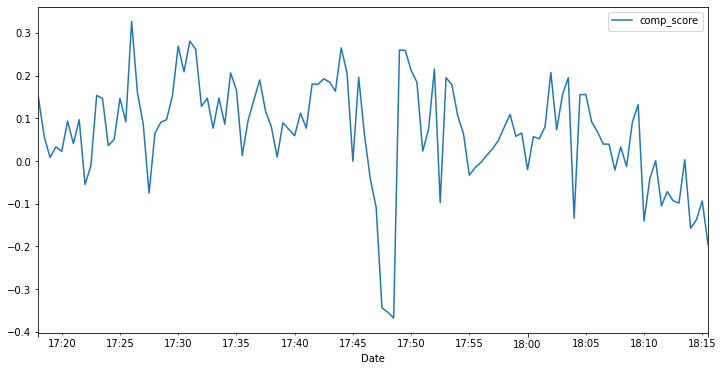

In [121]:
df30.plot(figsize=(12,6))

In [519]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [520]:
len(df30)

116

In [547]:
train.head()

,comp_score
Date,
2021-10-18 17:18:00,0.147404
2021-10-18 17:18:30,0.056627
2021-10-18 17:19:00,0.008208
2021-10-18 17:19:30,0.033074
2021-10-18 17:20:00,0.022255


In [521]:
train=df30.iloc[:-30]
test=df30.iloc[-30:]

In [522]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [523]:
df30.head(),df30.tail()

(                     comp_score
 Date                           
 2021-10-18 17:18:00    0.147404
 2021-10-18 17:18:30    0.056627
 2021-10-18 17:19:00    0.008208
 2021-10-18 17:19:30    0.033074
 2021-10-18 17:20:00    0.022255,
                      comp_score
 Date                           
 2021-10-18 18:13:30    0.002853
 2021-10-18 18:14:00   -0.157733
 2021-10-18 18:14:30   -0.137838
 2021-10-18 18:15:00   -0.093781
 2021-10-18 18:15:30   -0.195750)

In [524]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [548]:
scaled_train[:10]

array([[ 0.49214677],
       [-0.24505843],
       [-0.63826879],
       [-0.43633099],
       [-0.52419431],
       [ 0.05099378],
       [-0.37417173],
       [ 0.07930035],
       [-1.15120824],
       [-0.80005905]])

In [525]:
scaled_test[:10]

array([[-0.28356215],
       [-0.05623645],
       [ 0.97804764],
       [-0.11091017],
       [ 0.55358258],
       [ 0.88010314],
       [-1.79177848],
       [ 0.5562732 ],
       [ 0.56167448],
       [ 0.04020863]])

In [526]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [527]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [528]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[ 0.49214677 -0.24505843 -0.63826879 -0.43633099 -0.52419431  0.05099378
 -0.37417173  0.07930035 -1.15120824 -0.80005905  0.54144702  0.4854168 ]
Predict this y: 
 [[-0.41457666]]


In [529]:
X.shape

(1, 12, 1)

In [530]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [531]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [532]:
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [533]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [534]:
model.fit(generator,epochs=20)

Epoch 1/20
74/74 [==============================] - 2s 3ms/step - loss: 1.1539
Epoch 2/20
74/74 [==============================] - 0s 3ms/step - loss: 1.0049
Epoch 3/20
74/74 [==============================] - 0s 3ms/step - loss: 0.9834
Epoch 4/20
74/74 [==============================] - 0s 3ms/step - loss: 0.9281
Epoch 5/20
74/74 [==============================] - 0s 3ms/step - loss: 0.8995
Epoch 6/20
74/74 [==============================] - 0s 3ms/step - loss: 0.8216
Epoch 7/20
74/74 [==============================] - 0s 3ms/step - loss: 0.8042
Epoch 8/20
74/74 [==============================] - 0s 3ms/step - loss: 0.7845
Epoch 9/20
74/74 [==============================] - 0s 3ms/step - loss: 0.7874
Epoch 10/20
74/74 [==============================] - 0s 3ms/step - loss: 0.7250
Epoch 11/20
74/74 [==============================] - 0s 3ms/step - loss: 0.6156
Epoch 12/20
74/74 [==============================] - 0s 3ms/step - loss: 0.6385
Epoch 13/20
74/74 [==============================

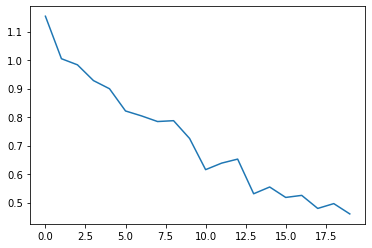

In [535]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [536]:
last_train_batch = scaled_train[-12:]

In [537]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [538]:
model.predict(last_train_batch)

array([[0.00067722]], dtype=float32)

In [539]:
scaled_test[0]

array([-0.28356215])

In [540]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [541]:
test_predictions

[array([0.00067722], dtype=float32),
 array([0.05062495], dtype=float32),
 array([0.08544759], dtype=float32),
 array([0.10593521], dtype=float32),
 array([0.11609275], dtype=float32),
 array([0.11931791], dtype=float32),
 array([0.11716504], dtype=float32),
 array([0.10971038], dtype=float32),
 array([0.09862775], dtype=float32),
 array([0.10013264], dtype=float32),
 array([0.10319081], dtype=float32),
 array([0.11090115], dtype=float32),
 array([0.10956891], dtype=float32),
 array([0.10857686], dtype=float32),
 array([0.10708541], dtype=float32),
 array([0.10553015], dtype=float32),
 array([0.1042382], dtype=float32),
 array([0.10340743], dtype=float32),
 array([0.10309586], dtype=float32),
 array([0.10321177], dtype=float32),
 array([0.10351655], dtype=float32),
 array([0.1037047], dtype=float32),
 array([0.10388595], dtype=float32),
 array([0.10406702], dtype=float32),
 array([0.10439719], dtype=float32),
 array([0.10471617], dtype=float32),
 array([0.10500602], dtype=float32),
 ar

In [542]:
test.head(10)

,comp_score
Date,
2021-10-18 18:01:00,0.051886
2021-10-18 18:01:30,0.079878
2021-10-18 18:02:00,0.207236
2021-10-18 18:02:30,0.073145
2021-10-18 18:03:00,0.154969
2021-10-18 18:03:30,0.195175
2021-10-18 18:04:00,-0.133831
2021-10-18 18:04:30,0.155300
2021-10-18 18:05:00,0.155965


In [543]:
true_predictions = scaler.inverse_transform(test_predictions)

In [544]:
test['Predictions'] = true_predictions

C:\Users\GUSTAV~1\AppData\Local\Temp/ipykernel_19408/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

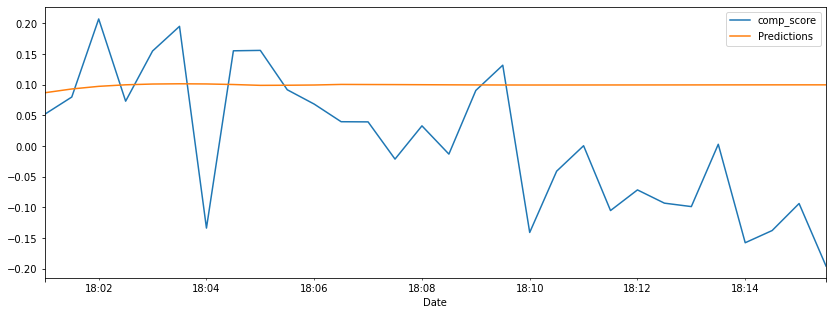

In [545]:
test.plot(figsize=(14,5))

In [404]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['comp_score'],test['comp_score']))
print(rmse)

0.0
